In [25]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [26]:
# Load the dataset
df = pd.read_csv('xwickets_dataset.csv')

# Display the first few rows of the dataset
df.head()

,ball_speed,stump_coverage,landing_x,landing_y,wicket
0,140,80,-1.5,20,1
1,130,60,-0.5,19,0
2,120,70,0.0,21,0
3,110,50,1.5,22,1
4,115,75,-1.0,18,0


In [27]:
# Split the data into features and target
X = df[['ball_speed', 'stump_coverage', 'landing_x', 'landing_y']].values
y = df['wicket'].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [28]:
# Build a Neural Network Model
model = Sequential([
    Input(shape=(X_train.shape[1],)),  # Define input layer with shape of the input data
    Dense(16, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])


In [29]:
# Define Custom Metric: xW (Expected Wickets)
def custom_xW_metric(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)  # Ensure both y_true and y_pred are float32
    return tf.reduce_mean(tf.abs(y_true - y_pred))

# Compile the Model
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy', custom_xW_metric])



In [30]:
# Train the Model
history = model.fit(X_train, y_train, 
                    epochs=30, 
                    batch_size=32, 
                    validation_split=0.2,
                    verbose=1)


Epoch 1/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.6667 - custom_x_w_metric: 0.3333 - loss: 4.8931 - val_accuracy: 0.0000e+00 - val_custom_x_w_metric: 0.9994 - val_loss: 7.4796
Epoch 2/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - accuracy: 0.6667 - custom_x_w_metric: 0.3333 - loss: 4.1466 - val_accuracy: 0.0000e+00 - val_custom_x_w_metric: 0.9970 - val_loss: 5.8137
Epoch 3/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.6667 - custom_x_w_metric: 0.3334 - loss: 3.4033 - val_accuracy: 0.0000e+00 - val_custom_x_w_metric: 0.9844 - val_loss: 4.1632
Epoch 4/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 0.6667 - custom_x_w_metric: 0.3341 - loss: 2.6639 - val_accuracy: 0.0000e+00 - val_custom_x_w_metric: 0.9234 - val_loss: 2.5693
Epoch 5/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - accuracy: 0.6667 - custom_x_w_metric: 0.3382 - loss: 1.9374 - val_accuracy: 0.0000e+00 - val_custom_x_w_metric: 0.7031 - val_loss: 1.2143
Epoch 6/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - ac

In [31]:
# Evaluate the Model
loss, accuracy, xW = model.evaluate(X_test, y_test, verbose=0)
print(f"Model Accuracy: {accuracy:.2f}")
print(f"Expected Wicket (xW) Metric: {xW:.2f}")



Model Accuracy: 0.00
Expected Wicket (xW) Metric: 0.52


In [34]:
# Make Predictions on Test Data
y_pred = model.predict(X_test)

# Ensure that y_pred is flattened if necessary
y_pred_flat = y_pred.flatten()

# Print some predicted values and actual values
for i in range(min(10, len(y_pred_flat))):  # Ensure we do not exceed the length of y_pred_flat
    predicted_value = y_pred_flat[i]  # Get the predicted value
    actual_value = y_test[i]  # Get the actual value
    print(f"Predicted: {predicted_value:.2f}, Actual: {actual_value}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step
Predicted: 0.52, Actual: 0


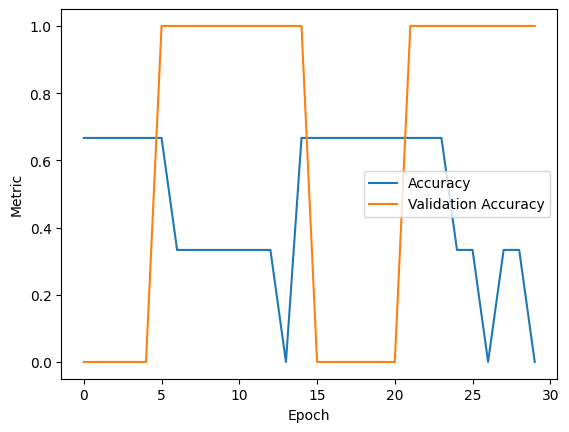

In [35]:
#Plot Training History
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

# Check if the custom_xW_metric exists before plotting
if 'custom_xW_metric' in history.history:
    plt.plot(history.history['custom_xW_metric'], label='xW Metric')
    plt.plot(history.history['val_custom_xW_metric'], label='Val xW Metric')

plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.legend()
plt.show()
